# Playing around with the dummy Gaia archive

gully

Sept 2, 2016

## Attempt 1: 100000 sources in Taurus, $1^{\circ}$ radius

```SQL
SELECT TOP 100000 * FROM public.gaia_source  WHERE CONTAINS(POINT('ICRS',public.gaia_source.ra,public.gaia_source.dec),CIRCLE('ICRS',64.1171208,28.1266139,1.0))=1  
```

In [1]:
! gunzip -d ../data/result.vot_01.gz

gunzip: ../data/result.vot_01.gz: not in gzip format


Apparently not in gzip format, despite the file extension

In [2]:
#! head -n 200 ../data/result.vot_01.gz

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
from astropy.io import votable

In [6]:
votable.is_votable('../data/result.vot_01.gz')

False

In [7]:
out = votable.parse_single_table('../data/result.vot_01.gz')

In [8]:
out2 = out.to_table()

In [9]:
out3 = out2.to_pandas()

In [10]:
out2[0:5]

astrometric_chi2_ac,astrometric_chi2_al,astrometric_delta_q,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_go_f,astrometric_n_obs_ac,astrometric_n_obs_al,astrometric_n_outliers_ac,astrometric_n_outliers_al,astrometric_params_solved,astrometric_primary_flag,astrometric_priors_used,astrometric_rank_defect,astrometric_relegation_factor,astrometric_weight_ac,astrometric_weight_al,dec,dec_error,dec_parallax_corr,dec_pmdec_corr,dec_pmra_corr,matched_observations,parallax,parallax_error,parallax_pmdec_corr,parallax_pmra_corr,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_g_n_obs,phot_variable_flag,pmdec,pmdec_error,pmra,pmra_error,pmra_pmdec_corr,ra,ra_dec_corr,ra_error,random_index,ra_parallax_corr,ra_pmdec_corr,ra_pmra_corr,ref_epoch,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,source_id
,,,Angle[mas],,,,,,,,,,,,Angle[mas^-2],Angle[mas^-2],Angle[deg],Angle[mas],Dimensionless[see description],Dimensionless[see description],Dimensionless[see description],,Angle[mas],Angle[mas],Dimensionless[see description],Dimensionless[see description],Flux[e-/s],Flux[e-/s],Magnitude[mag],,Dimensionless[see description],Angular Velocity[mas/year],Angular Velocity[mas/year],Angular Velocity[mas/year],Angular Velocity[mas/year],Dimensionless[see description],Angle[deg],Dimensionless[see description],Angle[mas],,Dimensionless[see description],Dimensionless[see description],Dimensionless[see description],Time[Julian Years],Angle[deg],Angle[deg],Angle[deg],Angle[deg],,,,,
float32,float32,float32,float64,float64,float32,int32,int32,int32,int32,int16,bool,int32,int32,float32,float32,float32,float64,float64,float32,float32,float32,int16,float64,float64,float32,float32,float64,float64,float64,int32,object,float64,float64,float64,float64,float32,float64,float32,float64,int64,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,int64
--,--,0.0,0.0,0.0,0.0,--,--,--,--,0,False,--,0,0.0,--,--,27.250113648274571,2.9999999355286926,--,--,--,0,--,--,--,--,2669.7276411877683,197.84678819342389,17.053432604980468,0,--,--,--,--,--,--,64.66043817587564,--,2.9999999355286926,--,--,--,--,2000.0,--,--,--,--,--,--,--,--,150870415718325888
--,--,0.0,0.0,0.0,0.0,--,--,--,--,0,False,--,0,0.0,--,--,27.26158077840164,8.0000003166097127,--,--,--,0,--,--,--,--,548.27666749210982,42.337209033444559,18.772100588989257,0,--,--,--,--,--,--,64.669052686381264,--,9.0000001729859775,--,--,--,--,2000.0,--,--,--,--,--,--,--,--,150870518797541248
--,--,0.0,0.0,0.0,0.0,--,--,--,--,0,False,--,0,0.0,--,--,27.262784166666652,15.000000044043363,--,--,--,0,--,--,--,--,243.67110046433208,19.38425599744679,19.652589938354492,0,--,--,--,--,--,--,64.67942749999996,--,21.999999771477011,--,--,--,--,2000.0,--,--,--,--,--,--,--,--,150870518800285440
--,--,0.0,0.0,0.0,0.0,--,--,--,--,0,False,--,0,0.0,--,--,27.270930540093381,5.0000000146811203,--,--,--,0,--,--,--,--,1946.9282805744538,149.53503963828697,17.396225115966796,0,--,--,--,--,--,--,64.681303252625014,--,5.0000000146811203,--,--,--,--,2000.0,--,--,--,--,--,--,--,--,150870553157279744
--,--,0.0,0.0,0.0,0.0,--,--,--,--,0,False,--,0,0.0,--,--,27.273506388888876,324.99999362627483,--,--,--,0,--,--,--,--,509.30110439028897,187.63346372627387,18.852163455200195,0,--,--,--,--,--,--,64.685003611111071,--,229.99999188173396,--,--,--,--,2000.0,--,--,--,--,--,--,--,--,150870553158746240


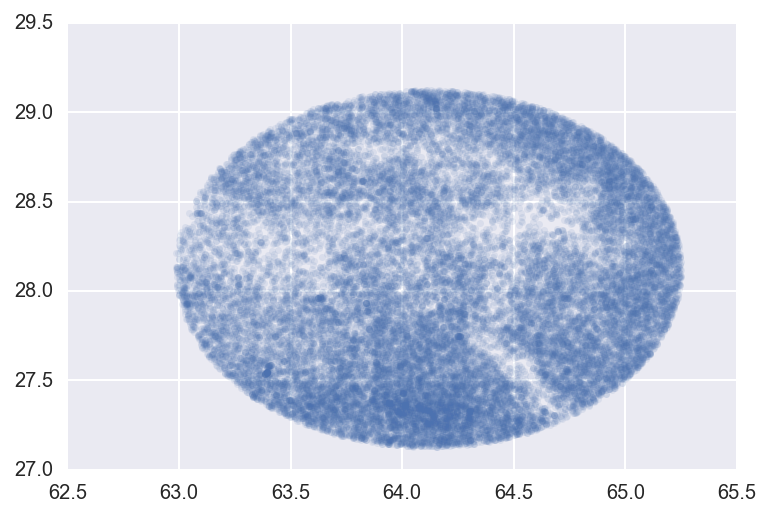

In [11]:
plt.plot(out3.ra, out3.dec, '.', alpha=0.1)

In [12]:
out3.columns

Index(['astrometric_chi2_ac', 'astrometric_chi2_al', 'astrometric_delta_q',
       'astrometric_excess_noise', 'astrometric_excess_noise_sig',
       'astrometric_go_f', 'astrometric_n_obs_ac', 'astrometric_n_obs_al',
       'astrometric_n_outliers_ac', 'astrometric_n_outliers_al',
       'astrometric_params_solved', 'astrometric_primary_flag',
       'astrometric_priors_used', 'astrometric_rank_defect',
       'astrometric_relegation_factor', 'astrometric_weight_ac',
       'astrometric_weight_al', 'dec', 'dec_error', 'dec_parallax_corr',
       'dec_pmdec_corr', 'dec_pmra_corr', 'matched_observations', 'parallax',
       'parallax_error', 'parallax_pmdec_corr', 'parallax_pmra_corr',
       'phot_g_mean_flux', 'phot_g_mean_flux_error', 'phot_g_mean_mag',
       'phot_g_n_obs', 'phot_variable_flag', 'pmdec', 'pmdec_error', 'pmra',
       'pmra_error', 'pmra_pmdec_corr', 'ra', 'ra_dec_corr', 'ra_error',
       'random_index', 'ra_parallax_corr', 'ra_pmdec_corr', 'ra_pmra_corr',
       '

In [13]:
out3.shape

(31602, 54)

In [14]:
vec = out3.parallax == out3.parallax
vec.sum(), len(vec)

(5, 31602)

//anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


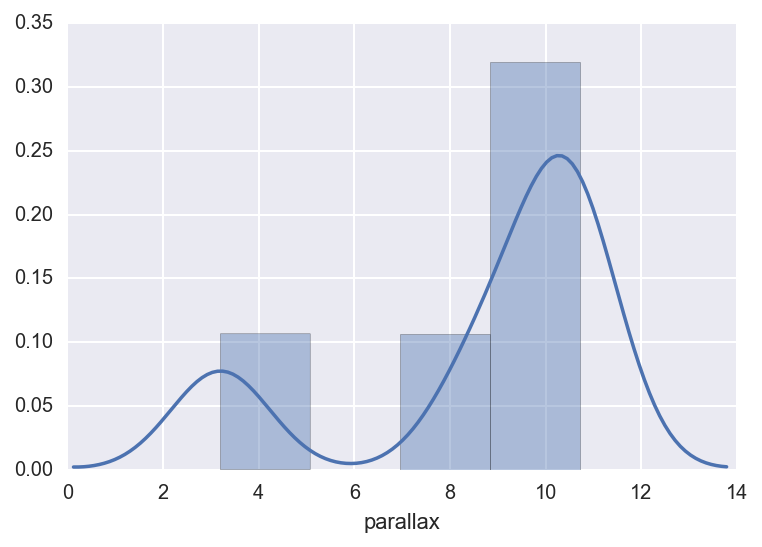

In [15]:
sns.distplot(out3.parallax[vec])

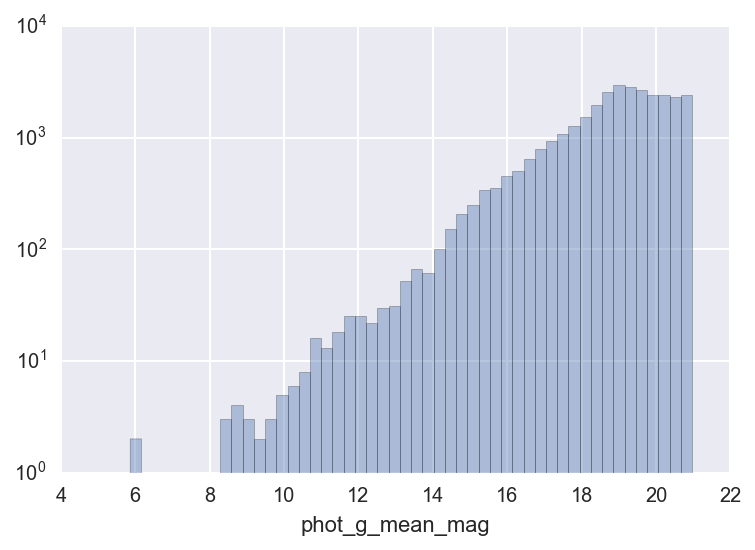

In [16]:
sns.distplot(out3.phot_g_mean_mag, kde=False)#, bins=np.arange(0,2E7, 10), kde=False)
plt.yscale('log')

In [17]:
out3.head()

,astrometric_chi2_ac,astrometric_chi2_al,astrometric_delta_q,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_go_f,astrometric_n_obs_ac,astrometric_n_obs_al,astrometric_n_outliers_ac,astrometric_n_outliers_al,...,ref_epoch,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,source_id
0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.508704e+17
1,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.508705e+17
2,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.508705e+17
3,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.508706e+17
4,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.508706e+17


## Attempt 2: `public.dual` example.

In [18]:
! du -hs ../data/result.vot_02.gz

4.0K	../data/result.vot_02.gz


In [20]:
tab2_raw = votable.parse_single_table('../data/result.vot_02.gz')

In [21]:
tab2_apy = tab2_raw.to_table()

In [25]:
tab2_apy

dummy
int32
1


In [22]:
tab2 = tab2_apy.to_pandas()

In [23]:
tab2

,dummy
0,1.0


## Table 3: 